# Lab 9: Principal Component Analysis (PCA)

In this session, we will apply the principal component analysis (PCA) technique to reduce the dimension of some data. This reduction allows us to decrease the number of features with conserving most of the information in the data which accelerates the learning algorithm without affecting a lot its expressiveness. In addition, the PCA helps to compress data and recover it without loosing a lot of significant information. Besides, in some cases, this technique helps to visualize on 2D and 3D graphs higher dimension data not visualizable in the original dimension.

First, we will implement the PCA on 2D data and visualize the original and recovered data. Then, we will calculate the error between recovered data and original one. In the second part, we will generate low rank 3D data and we will use [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) module from sklearn library to project it in a 2D plane. Then, we will try to visualize the data projected in 2D plane. Finally, we will work with "faces" dataset and we will try to compress it using PCA. Then, we will calculate the compression rate, the error and see how to choose the reduction dimension.

### Implement PCA
In this part, we will use Singular Vale Decomposition (SVD) to implement PCA. In fact ,the SVD determines the eigenvalues  and their corresponding  eigenvectors in decreasing order. the first K eigen vectors represent the K most important components of our data. Hence, we will project our data on these eigenvectors. Then, we will recover the data by doing the inverse transformation and we will calculate the error.

<font color="blue">**Question 1: **</font> 
- Load the data from "2D_data.txt" file in "X" variable and check its size. (use [loadtxt](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.loadtxt.html) function from numpy library) 
- Calculate the mean "mu" and the standard deviation "std" of the data. Then, calculate "X_norm" the normalized data. 
- Calculate the covariance matrix "SIGMA" given by: $\Sigma=\frac{1}{m}X_{norm}^\top X_{norm}$.
- Use [svd](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.linalg.svd.html) function from sklearn library to make singular value decomposition of $\Sigma$. This function will compute 3 arrays: U, S and V. The arrays "U" and "V" contain the eigenvectors. They are orthogonal matrix so the inverse is equal to the transpose and they are the inverses of each other. While "S" contains the eigenvalues. These arrays verify the following formulas:$$\Sigma=U\times diag(S)\times V$$

In [38]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

# load data
X =  np.loadtxt('2D_data.txt',delimiter='\t')  # ** your code here** 
print("The size of data is:",X.shape)
m = X.shape[0]

K=1 # reduction dimension

# normalize data
mu = X.mean(axis=0)   # ** your code here** 
std = X.std(axis=0)   # ** your code here** 
X_norm=(X-mu)/std  # ** your code here** 

# Singular value decomposition
SIGMA = np.dot(X_norm.T,X_norm)/m # you could also use np.cov(X_norm.T,bias=True)        # ** your code here** 

U,S,V = np.linalg.svd(SIGMA) # ** your code here** 
print("The size of U is:",U.shape)
print("The size of S is:",S.shape)
print("The size of V is:",V.shape)


The size of data is: (50, 2)
The size of U is: (2, 2)
The size of S is: (2,)
The size of V is: (2, 2)


<font color="blue">**Question 2: **</font> 
- Calculate the projected data "Z" given by: $Z=X_{norm}\times U_K$  
Where: $U_K$ represent the first K columns of the $U$ matrix.
- Calculate the recovered data given by: $X_{rec}=Z\times U_K^{-1}=Z\times U_K^\top$ 
- Calculate the projection error: $\frac{1}{m}\sum_{i=1}^m\left \| x_{norm}^{(i)}-x_{rec}^{(i)} \right \|^2$  
where: $\left \| x \right \|^2=\sum_{j=1}^nx_j^2$ 

The projection error is: 0.264469623737


<IPython.core.display.Javascript object>


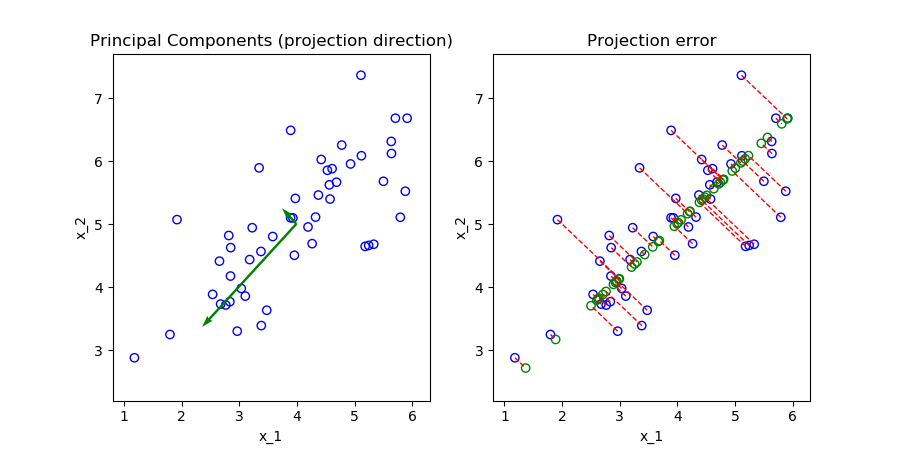

Text(0.5,1,'Projection error')

In [39]:
# project dataon K dimension
Z = np.dot(X_norm,U[:,:K])   # ** your code here** 

# recover data
X_rec = np.dot(Z,U[:,:K].T)  # ** your code here** 

# calculate error 
proj_error = np.sum((X_norm-X_rec)**2)/m  # ** your code here** 
print("The projection error is:",proj_error)

# plot data
fig = plt.figure("PCA 2D data",figsize=(9,4.5))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(X[:,0],X[:,1],color="blue",marker='o',facecolors='none')
ax.quiver(mu[0],mu[1],S[0]*U[0,0],S[0]*U[1,0],color='green',scale=0.75,scale_units='xy',angles='xy')
ax.quiver(mu[0],mu[1],S[1]*U[0,1],S[1]*U[1,1],color='green',scale=0.75,scale_units='xy',angles='xy')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_xlim(0.8,0.8+5.5)
ax.set_ylim(2.2,2.2+5.5)
ax.set_title("Principal Components (projection direction)")

ax = fig.add_subplot(1, 2, 2)
ax.scatter(X[:,0],X[:,1],color="blue",marker='o',facecolors='none')
ax.scatter(std[0]*X_rec[:,0]+mu[0],std[1]*X_rec[:,1]+mu[1],color='green',marker='o',facecolors='none')
for i in range(m):
    ax.plot([X[i,0],std[0]*X_rec[i,0]+mu[0]],[X[i,1],std[1]*X_rec[i,1]+mu[1]],'r--',linewidth=1)
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_xlim(0.8,0.8+5.5)
ax.set_ylim(2.2,2.2+5.5)
ax.set_title("Projection error")

<font color="green">**Notes **</font> 
- We note that one principal component has higher eigenvalue than the other principal component. Thus, most of variability on the data is among the direction of the biggest principal component (eigenvector).
- The projection error is not very high since we project the data on the direction with most variability. Hence, we retain the most of information of the data.

### PCA with Sklearn
In this part, we will use sklearn library functions to generate low rank 3D data and apply the PCA on it. Then, we will visualize it in a 2D plane.

<font color="blue">**Question 3: **</font> 
- Generate low rank data of size $50\times 3$. You should use [make_low_rank_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_low_rank_matrix.html#sklearn.datasets.make_low_rank_matrix) function with the following parameters: "effective_rank=2","tail_strength=0.01" and "random_state=0"
- Calculate the mean "mu" and the standard deviation "std" of the data. Then, calculate "X_norm" the normalized data. 
- Use [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) module from sklearn library to create "pca" object with "n_components" equal to "K".
- Call [fit](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.fit) function of "pca" object with normalized data "X_norm".

In [49]:
from sklearn import datasets
from mpl_toolkits.mplot3d.axes3d import*
from sklearn.decomposition import PCA

# generate data
X=datasets.make_low_rank_matrix(50,3,effective_rank=2,tail_strength=0.01,random_state=0)  # ** your code here**
print("The size of data is:",X.shape)
m = X.shape[0]

K = 2 # reduction dimension

# normalize data
mu = X.mean(axis=0)   # ** your code here** 
std = X.std(axis=0)   # ** your code here** 
X_norm=(X-mu)/std  # ** your code here** 

# PCA
pca = PCA(n_components=K)  # ** your code here** 
pca.fit(X_norm)  # ** your code here** 

# projection plane coefficient
U=pca.components_ # eigenvectors matrix
a=U[0,1]*U[1,2]-U[0,2]*U[1,1]
b=U[0,2]*U[1,0]-U[0,0]*U[1,2]
c=U[0,0]*U[1,1]-U[0,1]*U[1,0]

print("The principal eigenvectors are:\n",U.T)

The size of data is: (50, 3)
The principal eigenvectors are:
 [[-0.07241944 -0.91503598]
 [-0.69156001  0.33275736]
 [ 0.71867947  0.22799495]]


<font color="blue">**Question 4: **</font> 
- Use [transform](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.transform) function of the "pca" object to project "X_norm" data and put the result in the variable "Z".
- Use [inverse_transform](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.inverse_transform) function of the "pca" object to recover data "X_rec" from the projected data "Z".
- Calculate the projection error: $\frac{1}{m}\sum_{i=1}^m\left \| x_{norm}^{(i)}-x_{rec}^{(i)} \right \|^2$  
where: $\left \| x \right \|^2=\sum_{j=1}^n x_j^2$ 

The projection error is: 0.247122478162


<IPython.core.display.Javascript object>


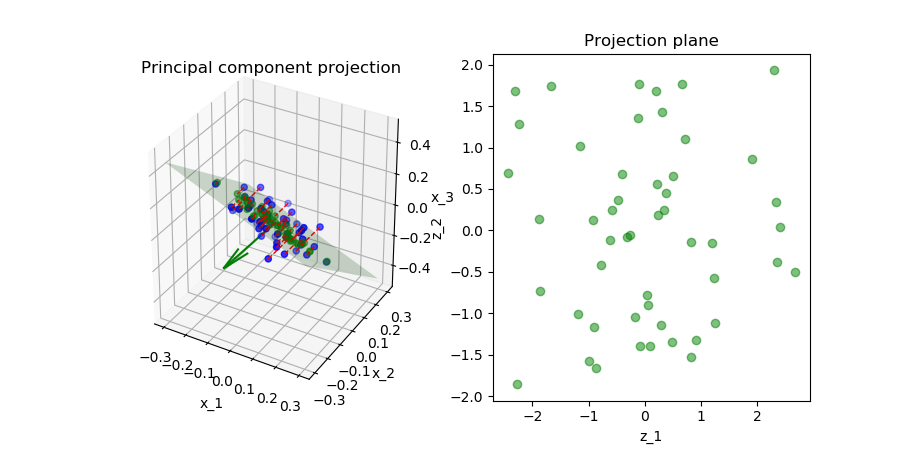

Text(0.5,1,'Projection plane')

In [50]:
# project data
Z = pca.transform(X_norm)  # ** your code here** 

# recover data
X_rec = pca.inverse_transform(Z)  # ** your code here** 

# calculate error 
proj_error = np.sum((X_norm-X_rec)**2)/m  # ** your code here** 
print("The projection error is:",proj_error)

# meshgrid for plane
x=np.array([[-0.3,-0.3],[0.3,0.3]])
y=np.array([[-0.3,0.3],[-0.3,0.3]])
z=-a/c*x-b/c*y

# plot data
fig = plt.figure("PCA 3D data",figsize=(9,4.5))
ax = fig.add_subplot(1, 2, 1,projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c="b", marker="o",facecolors='none')
ax.scatter(std[0]*X_rec[:,0]+mu[0], std[1]*X_rec[:,1]+mu[1], std[2]*X_rec[:,2]+mu[2], c="g", marker="o",facecolors='none',alpha=0.5)
ax.plot_surface(x,y,z,color="g",linewidth=1,alpha=0.2)
ax.quiver(0,0,0,a,b,c,color='g', arrow_length_ratio=0.4,length=0.3)
for i in range(m):
    ax.plot([X[i,0],std[0]*X_rec[i,0]+mu[0]],[X[i,1],std[1]*X_rec[i,1]+mu[1]],[X[i,2],std[2]*X_rec[i,2]+mu[2]],'r--',linewidth=1)
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('x_3')
ax.set_title("Principal component projection")

ax = fig.add_subplot(1, 2, 2)
plt.scatter(Z[:,0],Z[:,1],c="g",alpha=0.5)
ax.set_xlabel('z_1')
ax.set_ylabel('z_2')
ax.set_title("Projection plane")

<font color="green">**Notes **</font> 
- In this case, we project the 3 dimensional data on 2 dimensional space (plane). We note that the projection error is not very high because we project the data on the two highest principal components and we retain the most of variability (information). 
- In fact, the generated data has an effective rank of two which means that the most of variability is among two axes only and not 3. Thus, we project our data in 2D plane. However, in the following part we will see a metric that helps us to decide the number of dimension of the projection space.
- In the 3D plot, if we look to the projection plane from a normal direction we will see exactly the same scheme of the projection plane on the right.

### Faces dataset compression
In this last part, we will try to compress face images using principal component analysis (PCA). Then, we will evaluate the compression performance by calculating the compression ratio and the retained variance ratio.

In [9]:
def Display_faces(X_display,fig_name,Vmax=None,Vmin=None):
    """
    display face image contained in X_display 
    """
    if (Vmax==None):
        Vmax=X_display.max()
    if (Vmin==None):
        Vmin=X_display.min()
    # calculate number and size of patches fo each digit image
    nbr_select=X_display.shape[0] # number of digits to display
    origin_img_size=int(np.sqrt(X_display.shape[1]))
    nbr_patch_horiz=int(np.floor(np.sqrt(nbr_select)))
    nbr_patch_vertic=int(np.ceil(nbr_select/nbr_patch_horiz))
    img_width=32
    img_height=32
    
    # create Display_matrix that contains all image patches
    Display_matrix=-np.ones((nbr_patch_vertic*(img_height+1)-1,nbr_patch_horiz*(img_width+1)-1))
    for i in range(nbr_patch_vertic):
        for j in range(nbr_patch_horiz):
            if (i*nbr_patch_horiz+j>=nbr_select):
                break
            Display_matrix[i*(img_height+1):(i+1)*img_height+i,j*(img_width+1):(j+1)*img_width+j]=np.reshape(X_display[i*nbr_patch_horiz+j,np.arange(origin_img_size**2)%origin_img_size<img_height][:img_width*img_height],(img_height,img_width),order='F')
    plt.figure(fig_name,figsize=(max(3,nbr_patch_horiz),max(3,nbr_patch_vertic)))
    plt.imshow(Display_matrix,cmap="gray",vmax=Vmax,vmin=Vmin)
    plt.axis('off')
    plt.show()

<font color="blue">**Question 5: **</font> 
- Load the data from "face.txt" file in "face" variable and check its size. (use [loadtxt](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.loadtxt.html) function from numpy library)  
This dataset contains 5000 of $32 \times 32$ pixel images. These images are flatten and saved on a single line of 1024 pixels on our dataset.
- Calculate the covariance matrix "SIGMA" given by: $\Sigma=\frac{1}{m}X_{norm}^\top X_{norm}$.
- Use [svd](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.linalg.svd.html) function from sklearn library to make singular value decomposition. This function will compute 3 arrays: U, S and V. The arrays "U" and "V" contain the eigenvectors. They are orthogonal matrix so the inverse is equal to the transpose and they are the inverses of each other. While "S" contains the eigenvalues. these arrays verify the following formulas:$$\Sigma=U\times diag(S)\times V$$


The size of face dataset is: (5000, 1024)


<IPython.core.display.Javascript object>


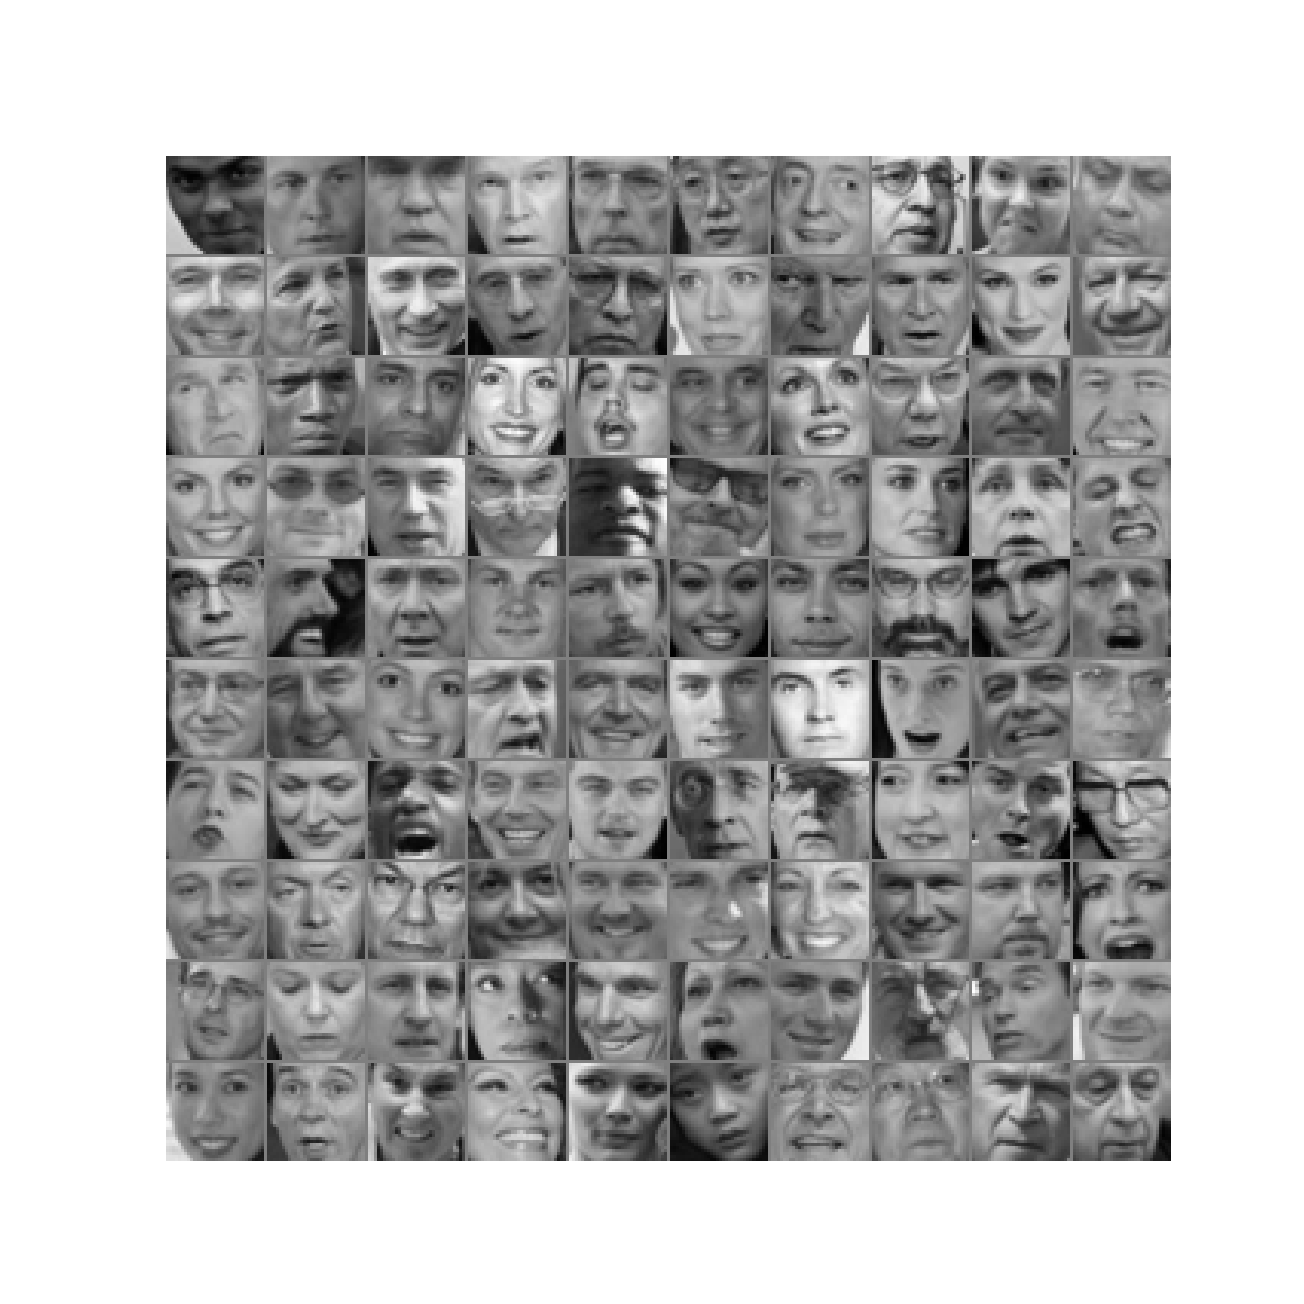

In [10]:
# load data
face=np.loadtxt('face.txt',delimiter='\t')  # ** your code here** 
print("The size of face dataset is:",face.shape)
m =face.shape[0]

# visualize data
nbr_select=100
np.random.seed(0)
rand_perm=np.random.permutation(m)
Display_faces(face[rand_perm[:nbr_select],:],'Visualize some images', 128,-128)

K = 100 # reduction dimension

# Singular value decomposition
SIGMA =np.dot(face.T,face)/m  # ** your code here** 
U,S,V = np.linalg.svd(SIGMA)  # ** your code here** 


<font color="blue">**Question 6: **</font> 
- Calculate the projected data "Z" given by: $Z=face\times U_K$  
Where: $U_K$ represent the first K columns of $U$ matrix.
- Calculate the recovered data given by: $face_{rec}=Z\times U_K^{-1}=Z\times U_K^\top$ 
- Calculate compression ratio "comp_ratio": number of pixel of original dataset/ (number of pixel of compressed  data+size of K columns of matrix U necessary for recovery)
- Calculate the retained variance ratio "retain_var": $$1-\frac{\sum_{i=1}^m\left \| face^{(i)}-face_{rec}^{(i)} \right \|^2}{\sum_{i=1}^m\left \| face^{(i)} \right \|^2}$$
- Change value of "K" in the previous block and re-execute to see how retained variance vary.

(5000, 100)
The compression ratio is: 8.50
94.34 % of variance is retained


<IPython.core.display.Javascript object>


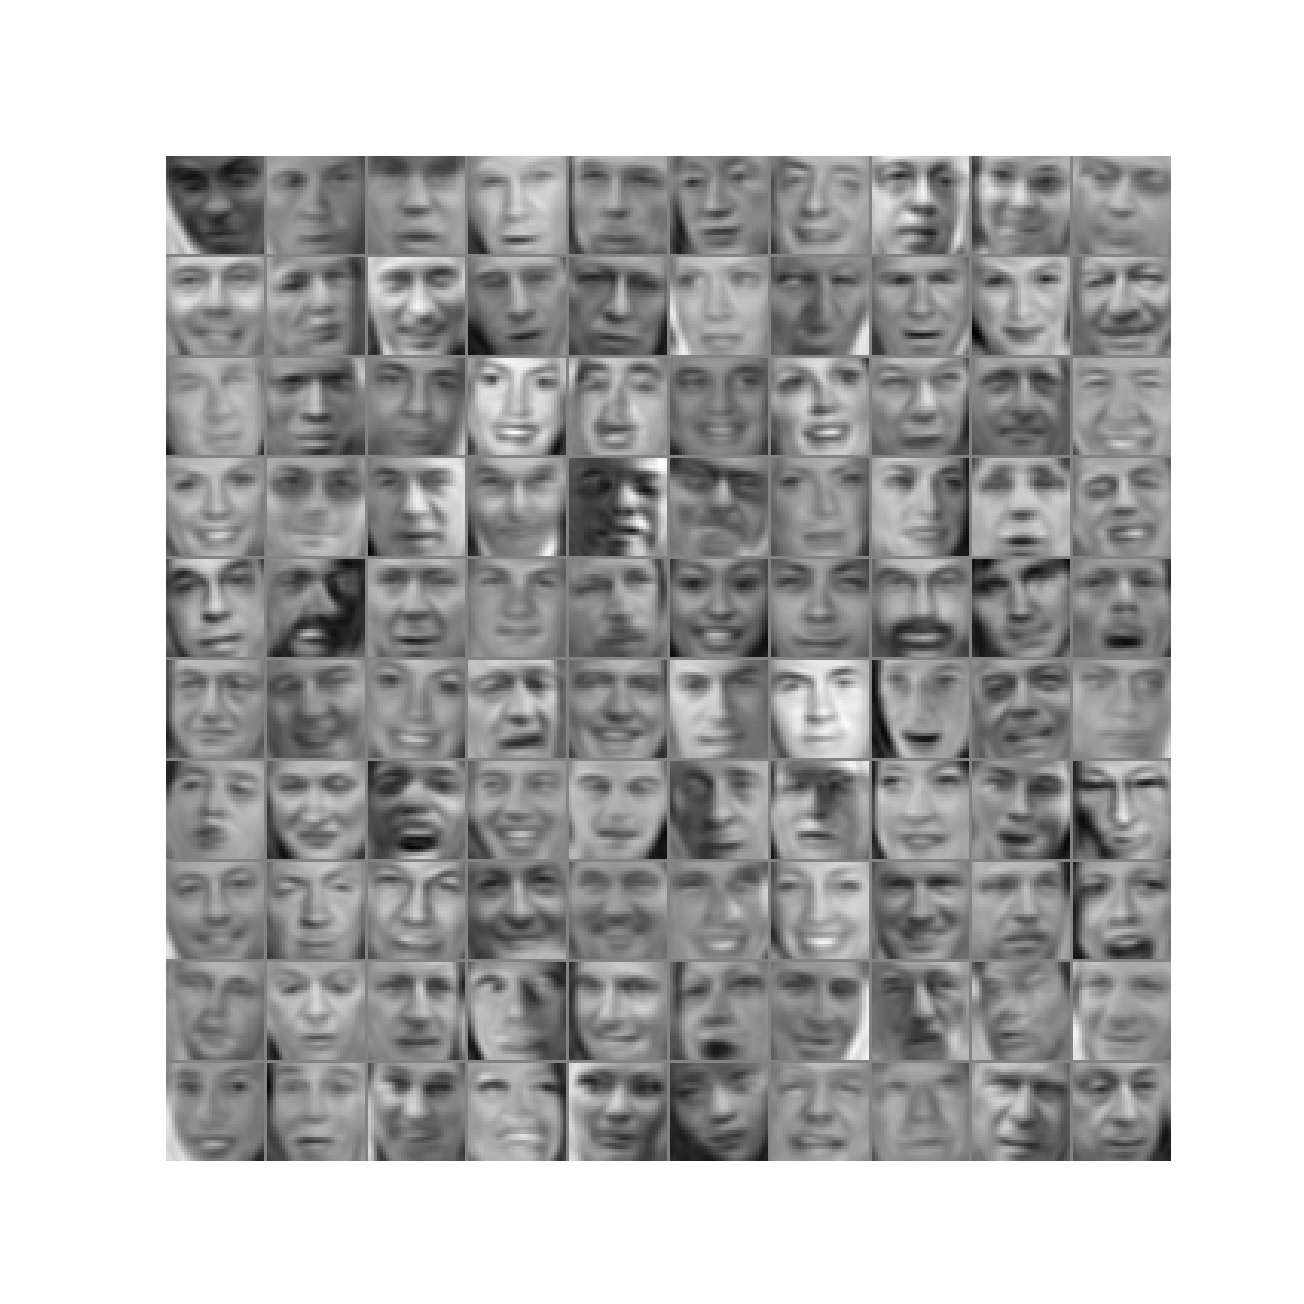

<IPython.core.display.Javascript object>


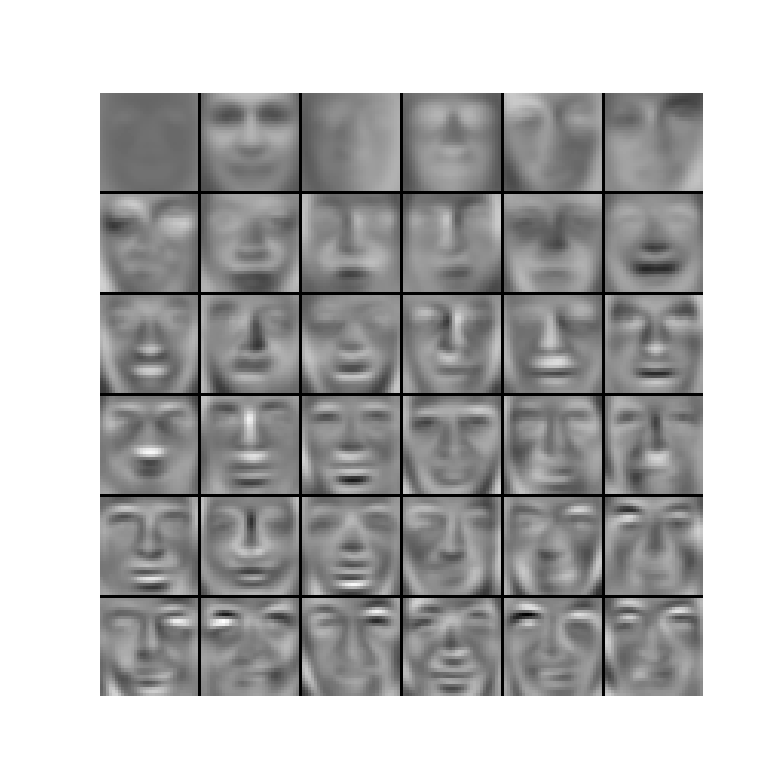

In [11]:
# data projection and recovery
Z = np.dot(face,U[:,:K])  # ** your code here** 
face_rec = np.dot(Z,U[:,:K].T)  # ** your code here** 
print(Z.shape)
#calulate comression ratio and retained varaince
comp_ratio=(m*face.shape[1])/(m*K+U.shape[0]*K)  # ** your code here** 
print("The compression ratio is: %.2f"%comp_ratio)
retain_var=1-np.sum((face-face_rec)**2)/np.sum((face)**2)   # ** your code here** 
print("%.2f"%(retain_var*100),"% of variance is retained")

# display compressed image and some principal component
Display_faces(face_rec[rand_perm[:nbr_select],:],'Compressed images')
Display_faces(U[:,:36].T,'Principal components')

<font color="green">**Notes **</font> 
- Perceptually, there is no big difference between compressed images and originals ones. Besides, we still recognize faces even the image quality decrease a little bit.
- We note that the size of images is reduced 8 times and half. However, we retain about 95% of variance (information).
- The K first principal components are the K first columns of matrix U. They have 1024 components each which represent a $32\times 32$ mask image. If we reconstruct these images, we note that the highest principal components are smooth masks while the less important components concentrate more and more on face details.
- In fact the recovered face images are constructed with weighted  sum of these mask images. Thus, first components helps to reconstruct the general shape of the face. Then, it starts to concentrate on details. 